<a href="https://colab.research.google.com/github/al00pes/analise-exploratoria-puc-2023/blob/main/Aula2_1_Pr%C3%A9_processamento_visualiza%C3%A7a%C3%B5_grafico_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# carrega biliotcas utilizadas

# manipulação de dataframes

import pandas as pd
import numpy as np

#construção de gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl

# Exibição de dados no jupyter notebbok
#from IPython.display import display

In [2]:
# Define paleta de cores para exportação e importação

corexportacao = '#414487'
corimportacao = '#22a884'

# Carrega uma folha de estilos ( opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos ( opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True) # Cor de fundo da área do gráfico
plt.rc("grid", color = "#f0f0f0") # cores de grid

# plt.rcdefaults() # Restaura a configuração default

Carrega e prepara os dados

In [3]:
# Dados dos países do G20 (includindo Espanha, excluindo União Europaia) obtidos do Banco Mundial:
# https://databank.worldbank.org/G20-pop-gdp-imp-exp-gini/id/d0bc168d

# Carrrega dados brutos do G20
G20 = pd.read_csv("https://raw.githubusercontent.com/simonedjb/ccec-vis-info-pub/main/dados/G20-WorldDev-02.csv",
                  na_values="..",
                  skipfooter=5,
                  engine="python").drop(columns="Series Code") # excluindo a coluna "Series Code"

# Examina o dataframe carregado
G20.head()

,Country Name,Country Code,Series Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Argentina,ARG,GDP (current US$),5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.528184e+11,3.895910e+11,4.914927e+11
1,Argentina,ARG,GDP growth (annual %),-1.026420e+00,2.405324e+00,-2.512615e+00,2.731160e+00,-2.080328e+00,2.818503e+00,-2.617396e+00,-2.025934e+00,-9.895269e+00,1.026376e+01
2,Argentina,ARG,GDP per capita growth (annual %),-2.145284e+00,1.265685e+00,-3.578581e+00,1.629664e+00,-3.110064e+00,1.757648e+00,-3.601610e+00,-2.994388e+00,-1.076511e+01,9.223956e+00
3,Argentina,ARG,GDP per capita (current US$),1.308266e+04,1.308025e+04,1.233480e+04,1.378906e+04,1.279024e+04,1.461304e+04,1.179516e+04,1.007636e+04,8.585695e+03,1.072923e+04
4,Argentina,ARG,Imports of goods and services (% of GDP),1.428868e+01,1.471676e+01,1.400132e+01,1.178057e+01,1.356679e+01,1.396932e+01,1.632585e+01,1.451850e+01,1.355632e+01,1.512831e+01


In [4]:
# Dicionário para atribuir continentes aos países listados
PaisContinente = {
    "Argentina": "Américas",
    "Australia": "Oceania",
    "Brazil": "Américas",
    "Canada": "Américas",
    "China": "Ásia",
    "France": "Europa",
    "Germany": "Europa",
    "India": "Ásia",
    "Indonesia": "Oceania",
    "Italy": "Europa",
    "Japan": "Ásia",
    "Korea, Rep.": "Ásia",
    "Mexico": "Américas",
    "Russian Federation": "Europa",
    "Saudi Arabia": "Ásia",
    "South Africa": "África",
    "Turkiye": "Ásia",
    "United Kingdom": "Europa",
    "United States": "Américas",
    "Spain": "Europa"
}

In [5]:
# Cria uma coluna "continent" associando os continentes aos países
G20["Continent"] = G20.apply(lambda row : PaisContinente[row["Country Name"]], axis = 1)

# Exibe o dataframe resultante
G20.head()

,Country Name,Country Code,Series Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],Continent
0,Argentina,ARG,GDP (current US$),5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.528184e+11,3.895910e+11,4.914927e+11,Américas
1,Argentina,ARG,GDP growth (annual %),-1.026420e+00,2.405324e+00,-2.512615e+00,2.731160e+00,-2.080328e+00,2.818503e+00,-2.617396e+00,-2.025934e+00,-9.895269e+00,1.026376e+01,Américas
2,Argentina,ARG,GDP per capita growth (annual %),-2.145284e+00,1.265685e+00,-3.578581e+00,1.629664e+00,-3.110064e+00,1.757648e+00,-3.601610e+00,-2.994388e+00,-1.076511e+01,9.223956e+00,Américas
3,Argentina,ARG,GDP per capita (current US$),1.308266e+04,1.308025e+04,1.233480e+04,1.378906e+04,1.279024e+04,1.461304e+04,1.179516e+04,1.007636e+04,8.585695e+03,1.072923e+04,Américas
4,Argentina,ARG,Imports of goods and services (% of GDP),1.428868e+01,1.471676e+01,1.400132e+01,1.178057e+01,1.356679e+01,1.396932e+01,1.632585e+01,1.451850e+01,1.355632e+01,1.512831e+01,Américas


In [6]:
# Reformata o dataframe para o formato longo, criado uma coluna Year (ano)
# Essa função associa a variavel ao valor correspondente, identificando ano e associando ao valor.

G20_long = pd.melt(G20, id_vars = ["Country Name", "Country Code", "Continent", "Series Name"],
                   var_name = "Year",
                   value_name = "Value")

# Transforma a coluna Year para conter somente o valor númerico do ano
G20_long['Year'] = G20_long['Year'].apply(lambda x: int(x[:4]))

# exibe o dataframe resultante.
G20_long

,Country Name,Country Code,Continent,Series Name,Year,Value
0,Argentina,ARG,Américas,GDP (current US$),2012,5.459824e+11
1,Argentina,ARG,Américas,GDP growth (annual %),2012,-1.026420e+00
2,Argentina,ARG,Américas,GDP per capita growth (annual %),2012,-2.145284e+00
3,Argentina,ARG,Américas,GDP per capita (current US$),2012,1.308266e+04
4,Argentina,ARG,Américas,Imports of goods and services (% of GDP),2012,1.428868e+01
...,...,...,...,...,...,...
1995,United States,USA,Américas,Imports of goods and services (current US$),2021,NaN
1996,United States,USA,Américas,Exports of goods and services (% of GDP),2021,NaN
1997,United States,USA,Américas,Exports of goods and services (current US$),2021,NaN
1998,United States,USA,Américas,"Population, total",2021,3.318937e+08


In [7]:
# Examina o nome de todas as series de dados
sorted(set(G20_long['Series Name']))

['Exports of goods and services (% of GDP)',
 'Exports of goods and services (current US$)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Gini index',
 'Imports of goods and services (% of GDP)',
 'Imports of goods and services (current US$)',
 'Population, total']

Criando dataframe com os volumes de importação e exportação relativo ao PIB

In [8]:
# Cria um dataframe com apenas dos dados importando da coluna 'Series Name'
ie_long = G20_long[(G20_long['Series Name'] == 'Imports of goods and services (% of GDP)') | (G20_long['Series Name'] == 'Exports of goods and services (% of GDP)')].copy()

# Visualizando o daframe criando
ie_long.head()

,Country Name,Country Code,Continent,Series Name,Year,Value
4,Argentina,ARG,Américas,Imports of goods and services (% of GDP),2012,14.288683
6,Argentina,ARG,Américas,Exports of goods and services (% of GDP),2012,16.237859
14,Australia,AUS,Oceania,Imports of goods and services (% of GDP),2012,21.672765
16,Australia,AUS,Oceania,Exports of goods and services (% of GDP),2012,21.504677
24,Brazil,BRA,Américas,Imports of goods and services (% of GDP),2012,13.236735


Wide format - As respostas de um mesmo indivíduos estarão em uma única linha e cada resposta estará em uma coluna separada

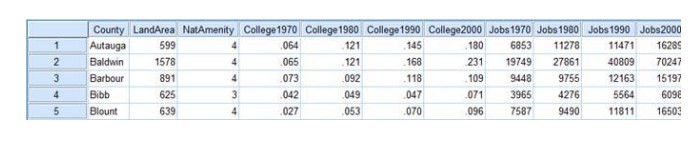

Long format - A diferença é que as informação são classificadas por colunas. Antes de cada ano ser especifica por varias colunas, ela é especificada por linhas.

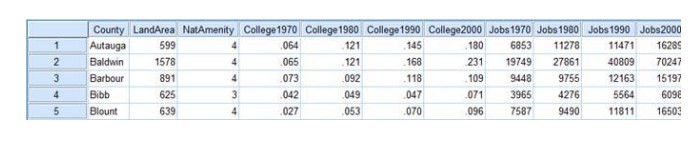


In [9]:
#Criando uma dataframe no format 'wide" com valores de exportação e importação

ie_wide = pd.pivot(ie_long, index = ['Country Name', 'Country Code', 'Continent', 'Year'], columns= 'Series Name', values='Value').reset_index()
ie_wide

Series Name,Country Name,Country Code,Continent,Year,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
0,Argentina,ARG,Américas,2012,16.237859,14.288683
1,Argentina,ARG,Américas,2013,14.617173,14.716756
2,Argentina,ARG,Américas,2014,14.405479,14.001315
3,Argentina,ARG,Américas,2015,10.705652,11.780574
4,Argentina,ARG,Américas,2016,12.527095,13.566793
...,...,...,...,...,...,...
195,United States,USA,Américas,2017,12.237189,15.008973
196,United States,USA,Américas,2018,12.342241,15.246618
197,United States,USA,Américas,2019,11.789535,14.579387
198,United States,USA,Américas,2020,10.162899,13.279559


In [14]:
# Criando um dataframe com dados de do ano de 2021

ie_wide_2021 = ie_wide[ie_wide["Year"] == 2021]

# Mostrando o novo dataset "ie_wide_2021"

ie_wide_2021.head()
# Grafico é o VisInfo-video05-aula02-grafico-dispersao.ipynb

Series Name,Country Name,Country Code,Continent,Year,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
9,Argentina,ARG,Américas,2021,18.300899,15.128306
19,Australia,AUS,Oceania,2021,22.182186,17.834795
29,Brazil,BRA,Américas,2021,20.097275,19.078847
39,Canada,CAN,Américas,2021,30.690538,30.535140
49,China,CHN,Ásia,2021,20.009814,17.421969


## Gráfico de dispersão ( scatterplot) com dados de importação e exportação relativos ao PIB em 2021

Gráfico de linhas simples, com os dados de exportação do Brasil relativos ao PIB

1: Plota a linha e inclui  título e rótulos dos eixos

- Função `pyplot.plot()`
- Função` Axes.set_title()` para o título
- Funções `Axes.set_xlabel()` e `Axes.set_ylabel()` para os rótulos dos eixos

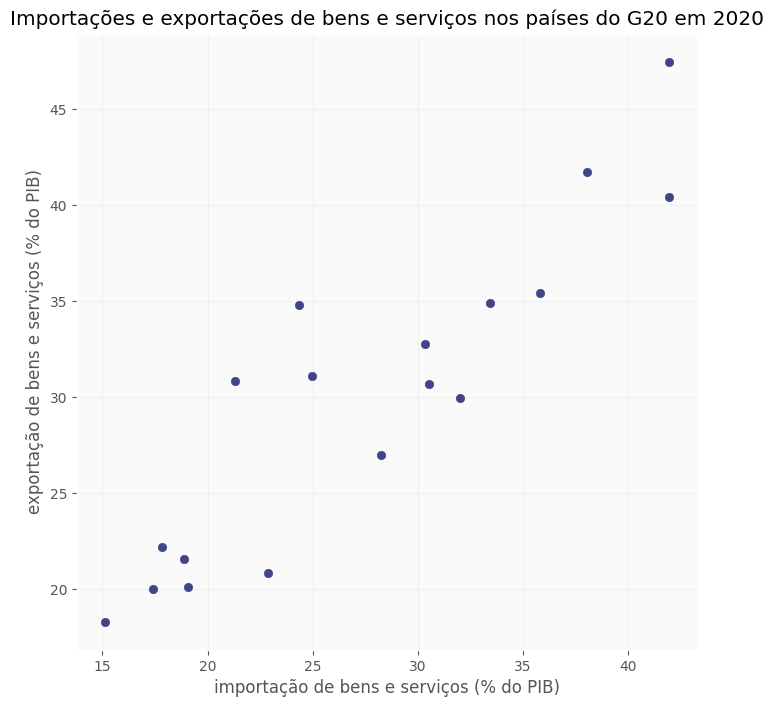

In [25]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = ie_wide_2021['Imports of goods and services (% of GDP)'], y = ie_wide_2021['Exports of goods and services (% of GDP)'],
        color = corexportacao)

# Acrescenta um título ao gráfico
ax.set_title('Importações e exportações de bens e serviços nos países do G20 em 2021')

# Define os rótulos dos eixos
ax.set_xlabel('importação de bens e serviços (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('exportação de bens e serviços (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("scatterplot.pdf")
plt.savefig( "scatterplot.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("scatterplot.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()


## Variação : Colorir pontos conforme o continente

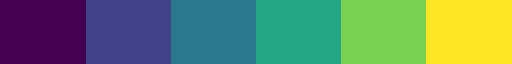

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [28]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fcfcfc", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

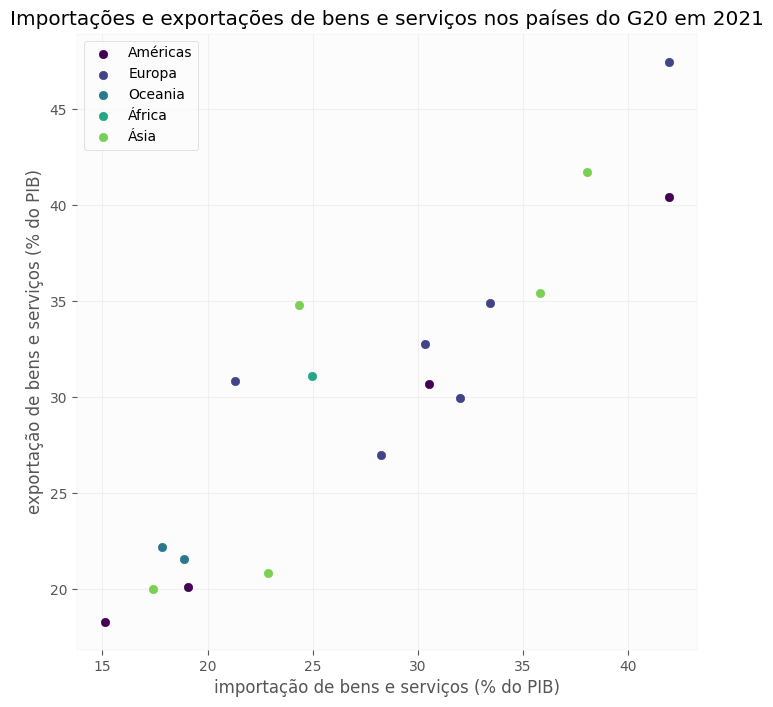

In [32]:
# Define as cores por continente
continentes = sorted(set(ie_wide["Continent"]))
dictCoresContinentes = dict(zip(continentes, coresViridis))

# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota um gráfico de dispersão por continente
plots = []
for i, continente in enumerate(continentes):
  dados = ie_wide_2021[(ie_wide_2021["Continent"] == continente)]
  plots.append(ax.scatter(x = dados['Imports of goods and services (% of GDP)'], y = dados['Exports of goods and services (% of GDP)'],
            color = dictCoresContinentes[continente],
            label = continente))

# Acrescenta um título ao gráfico
ax.set_title('Importações e exportações de bens e serviços nos países do G20 em 2021')

# Define os rótulos dos eixos
ax.set_xlabel('importação de bens e serviços (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('exportação de bens e serviços (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza

# Acrescenta legenda
plt.legend()

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("scatterplot-cores.pdf")
plt.savefig("scatterplot-cores.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("scatterplot-cores.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()

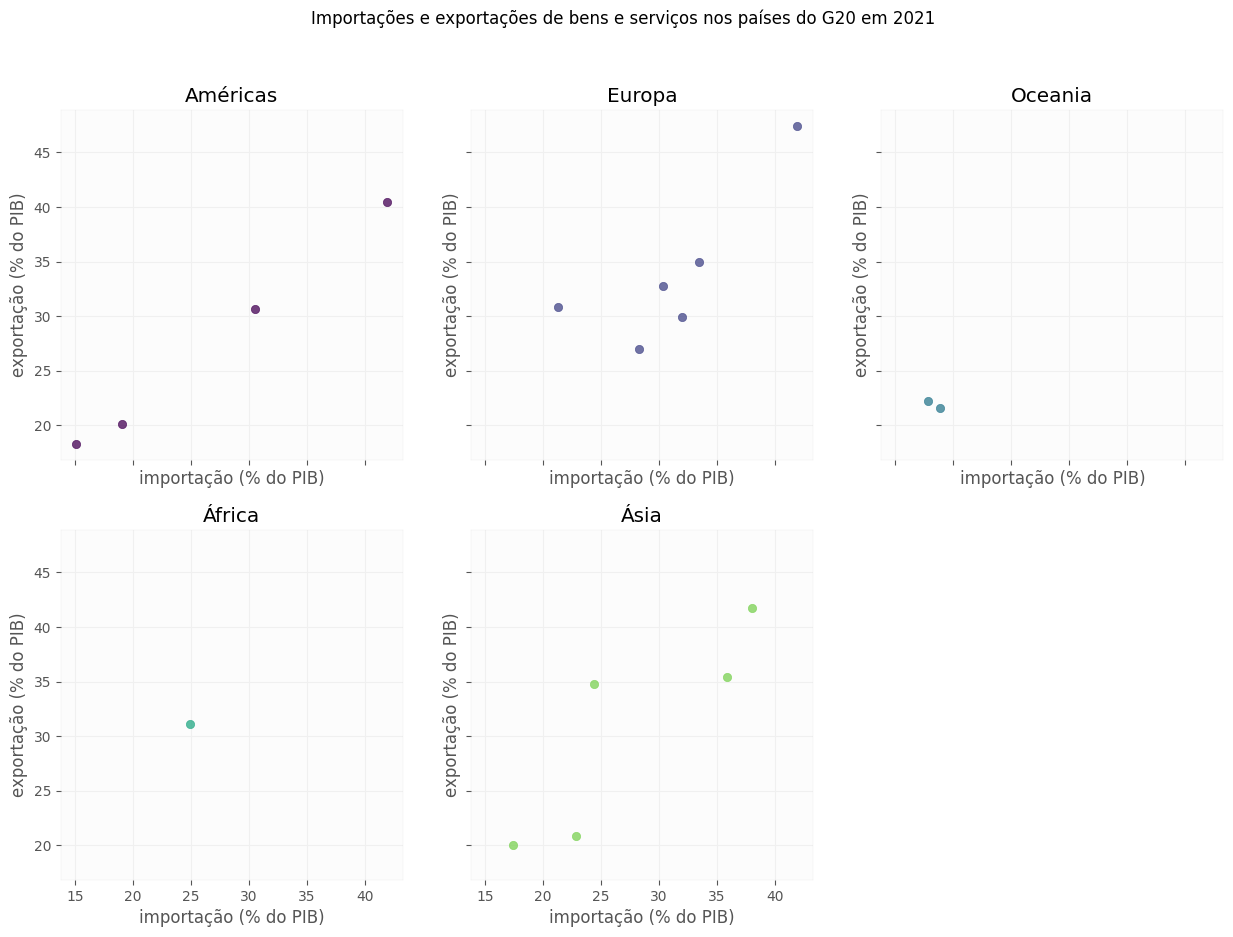

In [34]:
# Define as cores por continente
continentes = sorted(set(ie_wide["Continent"]))
dictCoresContinentes = dict(zip(continentes, coresViridis))

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 10
# e com eixos x e y compartilhados
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10), sharex = True, sharey = True)

# Plota um gráfico de dispersão por continente
for i in range(0, 2):
  for j in range(0, 3):
    k = i * 3 + j
    if k < len(continentes):
      continente = continentes[k]
      dados = ie_wide_2021[(ie_wide_2021["Continent"] == continente)]
      axs[i, j].scatter(x = dados['Imports of goods and services (% of GDP)'], y = dados['Exports of goods and services (% of GDP)'],
                color = dictCoresContinentes[continente],
                alpha = 0.75,
                label = continente)
      axs[i, j].set_title(continente)
      # Define os rótulos dos eixos
      axs[i,j].set_xlabel('importação (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza
      axs[i,j].set_ylabel('exportação (% do PIB)') # é importante esclarecer a unidade e a ordem de grandeza
    else:
      axs[i,j].set_visible(False)

# Acrescenta um título à figura (superior a todos os gráficos)
fig.suptitle('Importações e exportações de bens e serviços nos países do G20 em 2021')

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
plt.savefig("scatterplot-multiplos.pdf")
plt.savefig("scatterplot-multiplos.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("scatterplot-multiplos.png", dpi = 150, format = "png")

# Exibe o gráfico
plt.show()